In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [8]:
df = pd.read_csv('Data_Book_Geocode-py.csv')
df.head(5)
df.dropna(axis=0,how='any',subset=['LAT_google','LON_google'],inplace=True)
len(df)
df.head(5)

df=df.drop(['Unnamed: 0', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', "LON_geopy","LAT_geopy", "address"], axis=1)
df.head(5)

,lugares,labels,Quotes,order,Position,LAT_google,LON_google
0,New York,GPE,Also by Dan Brown \nDigital FortressA N G E L ...,0,0,40.712775,-74.005973
1,Avenue,FAC,"1230 Avenue of the Americas, New York, NY 1002...",1,1,40.749440,-74.003314
2,Americas,LOC,"1230 Avenue of the Americas, New York, NY 1002...",2,2,54.525961,-105.255119
3,New York,GPE,"1230 Avenue of the Americas, New York, NY 1002...",3,0,40.712775,-74.005973
4,NY,GPE,"1230 Avenue of the Americas, New York, NY 1002...",4,4,40.712775,-74.005973


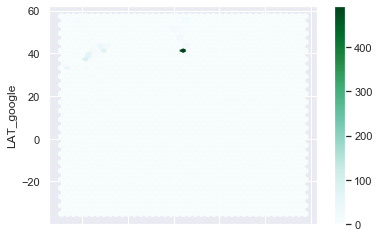

In [9]:

ax = df.plot.hexbin(x='LON_google', y='LAT_google', gridsize=40)

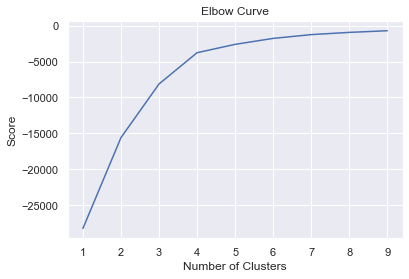

In [10]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['LAT_google']]
X_axis = df[['LON_google']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(df[df.columns[6:7]]) # Compute k-means clustering.
df['cluster_label'] = kmeans.fit_predict(df[df.columns[6:7]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df[df.columns[6:7]]) # Labels of each point
df.head(5)

,lugares,labels,Quotes,order,Position,LAT_google,LON_google,cluster_label
0,New York,GPE,Also by Dan Brown \nDigital FortressA N G E L ...,0,0,40.712775,-74.005973,4
1,Avenue,FAC,"1230 Avenue of the Americas, New York, NY 1002...",1,1,40.749440,-74.003314,4
2,Americas,LOC,"1230 Avenue of the Americas, New York, NY 1002...",2,2,54.525961,-105.255119,1
3,New York,GPE,"1230 Avenue of the Americas, New York, NY 1002...",3,0,40.712775,-74.005973,4
4,NY,GPE,"1230 Avenue of the Americas, New York, NY 1002...",4,4,40.712775,-74.005973,4


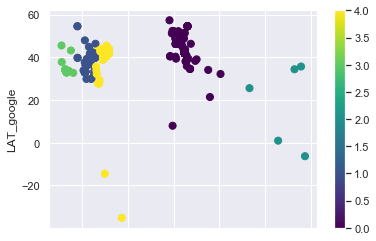

In [13]:
df.plot.scatter(x = 'LON_google', y = 'LAT_google', c=labels, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [96]:
df_2=df["LON_google"].value_counts(bins=50, normalize=True)
df_3=df["LAT_google"].value_counts(bins=50, normalize=True)

df_2.head(5)

(10.637, 15.969]      0.521782
(-96.019, -90.686]    0.159406
(-74.687, -69.355]    0.089109
(-85.353, -80.02]     0.046535
(-122.95, -117.35]    0.044554
Name: LON_google, dtype: float64

In [98]:
#Selection of first row only
min_lon=df_2.index[0].left
max_lon=df_2.index[0].right

min_lat=df_3.index[0].left
max_lat=df_3.index[0].right

In [123]:
min_lat, max_lat, min_lon, max_lon

(40.67, 42.52, 10.637, 15.969)

In [139]:
Data_clean=df.loc[(df["LON_google"] > min_lon) & (df["LON_google"] < max_lon) & (df["LAT_google"] > min_lat) & (df["LAT_google"] < max_lat)]

In [137]:
Data_clean

,lugares,labels,Quotes,order,Position,LAT_google,LON_google,cluster_label
10,Vatican City,GPE,"To my dear friend Irv Sittler, for facilitatin...",10,10,41.902916,12.453389,0
11,Rome,GPE,"To my dear friend Irv Sittler, for facilitatin...",11,11,41.902784,12.496365,0
12,Rome,GPE,"Nadeau, NuvoMedia andRocket E-books, Frank and...",12,11,41.902784,12.496365,0
19,Rome,GPE,One question looms: Will this highly volatile ...,19,11,41.902784,12.496365,0
57,Rome,GPE,"But in the 1500s, a group of men in Rome fough...",57,11,41.902784,12.496365,0
...,...,...,...,...,...,...,...,...
1015,the Vatican Grottoes,FAC,And had he not ascended miraculously into a pi...,1015,662,41.902167,12.453937,0
1018,Rome,GPE,there was no more fitting hotel in all of Rome,1018,11,41.902784,12.496365,0
1019,Vatican City,GPE,".”\nLangdon felt a sudden anxiety, wondering i...",1019,10,41.902916,12.453389,0
1020,Vatican,FAC,"\n“His Holiness asked me to give this to you,...",1020,67,41.902916,12.453389,0


In [140]:
Data_clean.to_csv("Data_clean.csv")